In [1]:
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import imageio
import random

tf.keras.backend.set_floatx('float64')

In [2]:
def load_data(folder):
    available_classes = os.listdir(folder)
    data = []
    for img_class in available_classes:
        images = os.listdir(folder + '/' + img_class)
        for image in images:
            path = folder + '/' + img_class + '/' + image
            try:
                img = imageio.imread(path).reshape(28, 28, 1)
            except Exception as e:
                print(e)
                continue
            data.append((img / 255., available_classes.index(img_class)))
    return data, available_classes

def remove_duplicates(train, val, test):
    index = {}
    for img, cls in val + test:
        if cls not in index:
            index[cls] = {}

        img = np.array(img.reshape(28 * 28))
        val_h = sum(img)
        if val_h not in index[cls]:
            index[cls][val_h] = []
        index[cls][val_h].append(img)
        
    duplicate_ids = []
    for i, img_cls in enumerate(train):
        img, cls = img_cls
        img = list(np.array(img.reshape(28 * 28)))
        h = sum(img)
        if h in index[cls]:
            candidates = index[cls][h]
            for candidate in candidates:
                if list(candidate) == img:
                    duplicate_ids.append(i)
                    break
                
    for data_id in reversed(duplicate_ids):
        del train[data_id]
        
def unzip(tuples):
    first = [t[0] for t in tuples]
    second = [t[1] for t in tuples]
    return np.array(first), np.array(second)

In [3]:
large_mnist = "../Lab 1/notMNIST_large"
small_mnist = "../Lab 1/notMNIST_small"

In [4]:
data, available_classes = load_data(small_mnist)

size = len(data)
train_size = int(size * 0.95)
val_size = int(train_size * 0.05)

random.shuffle(data)

train_data = data[:train_size]
test_data = data[train_size:]
val_data = train_data[:val_size]
train_data = train_data[val_size:]

remove_duplicates(train_data, val_data, test_data)

train_x, train_y = unzip(train_data)
val_x, val_y = unzip(val_data)
test_x, test_y = unzip(test_data)

Could not find a format to read the specified file in mode 'i'
Could not find a format to read the specified file in mode 'i'


In [5]:
from tensorflow.keras import layers, Model, Input, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten

num_classes = len(available_classes)
model = Sequential([
    Conv2D(28, (7, 7), input_shape=(28, 28, 1,)),
    Conv2D(28, (14, 14)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
    
model.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 28)        1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 28)          153692    
_________________________________________________________________
flatten (Flatten)            (None, 2268)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                145216    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 300,958
Trainable params: 300,958
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_x, train_y, epochs=20, batch_size=32, validation_data=(val_x, val_y))
first_score = model.evaluate(test_x, test_y)
print(first_score)

Train on 16626 samples, validate on 889 samples
Epoch 1/20
16626/16626 [==============================] - 54s 3ms/sample - loss: 0.6189 - accuracy: 0.8217 - val_loss: 0.4319 - val_accuracy: 0.8628
Epoch 2/20
16626/16626 [==============================] - 53s 3ms/sample - loss: 0.4078 - accuracy: 0.8831 - val_loss: 0.4168 - val_accuracy: 0.8875
Epoch 3/20
16626/16626 [==============================] - 53s 3ms/sample - loss: 0.3518 - accuracy: 0.9006 - val_loss: 0.5660 - val_accuracy: 0.8358
Epoch 4/20
16626/16626 [==============================] - 53s 3ms/sample - loss: 0.3089 - accuracy: 0.9116 - val_loss: 0.4556 - val_accuracy: 0.8763
Epoch 5/20
16626/16626 [==============================] - 53s 3ms/sample - loss: 0.2826 - accuracy: 0.9230 - val_loss: 0.4029 - val_accuracy: 0.8875
Epoch 6/20
16626/16626 [==============================] - 53s 3ms/sample - loss: 0.2594 - accuracy: 0.9270 - val_loss: 0.4146 - val_accuracy: 0.9100
Epoch 7/20
16626/16626 [==============================] - 

In [7]:
from tensorflow.keras.layers import MaxPooling2D

model = Sequential([
    Conv2D(28, (7, 7), input_shape=(28, 28, 1,)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])
    
model.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 22, 22, 28)        1400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3388)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                216896    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,946
Trainable params: 218,946
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(train_x, train_y, epochs=20, batch_size=32, validation_data=(val_x, val_y))
second_score = model.evaluate(test_x, test_y)
print(second_score)

Train on 16626 samples, validate on 889 samples
Epoch 1/20
16626/16626 [==============================] - 9s 523us/sample - loss: 0.4744 - accuracy: 0.8640 - val_loss: 0.3240 - val_accuracy: 0.9010
Epoch 2/20
16626/16626 [==============================] - 8s 483us/sample - loss: 0.2802 - accuracy: 0.9189 - val_loss: 0.2926 - val_accuracy: 0.9078
Epoch 3/20
16626/16626 [==============================] - 8s 488us/sample - loss: 0.2137 - accuracy: 0.9370 - val_loss: 0.2969 - val_accuracy: 0.9156
Epoch 4/20
16626/16626 [==============================] - 8s 490us/sample - loss: 0.1676 - accuracy: 0.9483 - val_loss: 0.2627 - val_accuracy: 0.9280
Epoch 5/20
16626/16626 [==============================] - 8s 489us/sample - loss: 0.1291 - accuracy: 0.9607 - val_loss: 0.2788 - val_accuracy: 0.9145
Epoch 6/20
16626/16626 [==============================] - 8s 480us/sample - loss: 0.1030 - accuracy: 0.9684 - val_loss: 0.2918 - val_accuracy: 0.9291
Epoch 7/20
16626/16626 [============================

In [9]:
from tensorflow.keras.layers import AveragePooling2D

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Flatten(),
    Dense(120, activation="relu"),
    Dropout(0.5),
    Dense(84, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])


model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dropout (Dropout)            (None, 120)              

In [10]:
history = model.fit(train_x, train_y, epochs=20, batch_size=32, validation_data=(val_x, val_y))
third_score = model.evaluate(test_x, test_y)
print(third_score)

Train on 16626 samples, validate on 889 samples
Epoch 1/20
16626/16626 [==============================] - 9s 545us/sample - loss: 0.9443 - accuracy: 0.6955 - val_loss: 0.4432 - val_accuracy: 0.8751
Epoch 2/20
16626/16626 [==============================] - 9s 512us/sample - loss: 0.5193 - accuracy: 0.8515 - val_loss: 0.3681 - val_accuracy: 0.8931
Epoch 3/20
16626/16626 [==============================] - 8s 507us/sample - loss: 0.4484 - accuracy: 0.8701 - val_loss: 0.3139 - val_accuracy: 0.9010
Epoch 4/20
16626/16626 [==============================] - 8s 500us/sample - loss: 0.4067 - accuracy: 0.8801 - val_loss: 0.2934 - val_accuracy: 0.9111
Epoch 5/20
16626/16626 [==============================] - 9s 512us/sample - loss: 0.3766 - accuracy: 0.8877 - val_loss: 0.3088 - val_accuracy: 0.9078
Epoch 6/20
16626/16626 [==============================] - 8s 510us/sample - loss: 0.3608 - accuracy: 0.8918 - val_loss: 0.2938 - val_accuracy: 0.9078
Epoch 7/20
16626/16626 [============================

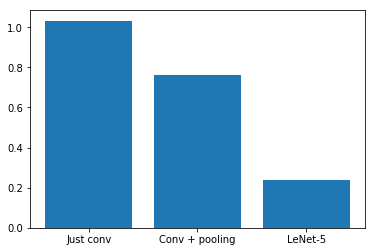

In [14]:
plt.bar(["Just conv", "Conv + pooling", "LeNet-5"], [first_score[0], second_score[0], third_score[0]])
plt.show()